# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

from functions import display_images_by_category, display_image_with_annotations, display_images_with_coco_annotations, visualize_annotation_mask
from skimage import io
import os


import kagglehub
import random

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1


In [3]:
# Load the annotations file
with open('Dataset/train/_annotations.coco.json', 'r') as file:
    annotations = json.load(file)

# Print the JSON content in a readable format
print(json.dumps(annotations, indent=4))

{
    "info": {
        "year": "2023",
        "version": "1",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2023-08-19T04:37:54+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "Tumor",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "0",
            "supercategory": "Tumor"
        },
        {
            "id": 2,
            "name": "1",
            "supercategory": "Tumor"
        }
    ],
    "images": [
        {
            "id": 0,
            "license": 1,
            "file_name": "2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg",
            "height": 640,
            "width": 640,
            "da

In [4]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

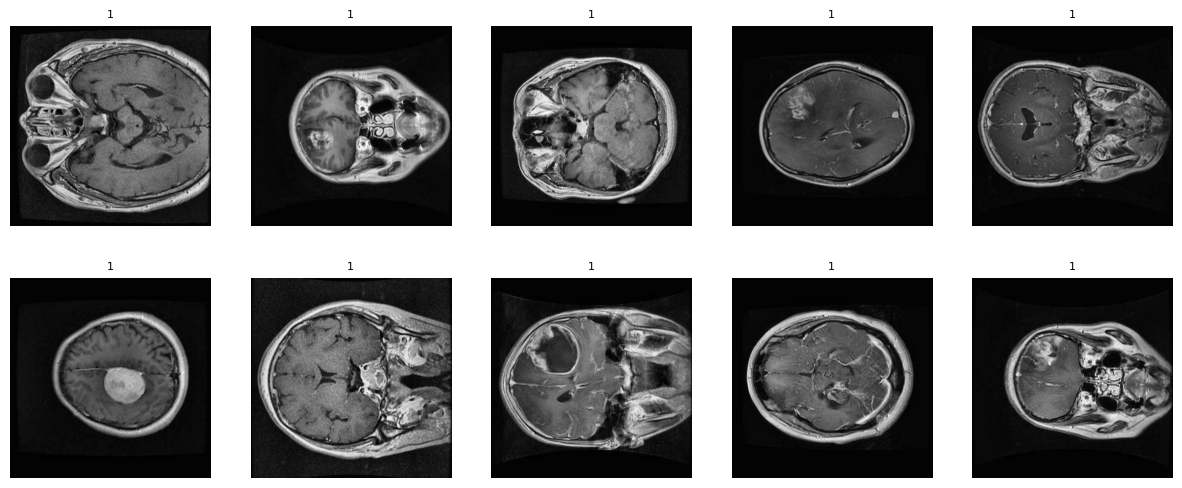

In [5]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

JSON description for 2723_jpg.rf.2c2663d65967a94950b0cd0ab3269c2b.jpg:
{'id': 1052, 'license': 1, 'file_name': '2723_jpg.rf.2c2663d65967a94950b0cd0ab3269c2b.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1012_jpg.rf.453866333dd04def7d83896e33f77155.jpg:
{'id': 63, 'license': 1, 'file_name': '1012_jpg.rf.453866333dd04def7d83896e33f77155.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1400_jpg.rf.e315b186822100eee1f94f398ea73997.jpg:
{'id': 477, 'license': 1, 'file_name': '1400_jpg.rf.e315b186822100eee1f94f398ea73997.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 292_jpg.rf.47ef3649ef513184fa6f20762d296816.jpg:
{'id': 99, 'license': 1, 'file_name': '292_jpg.rf.47ef3649ef513184fa6f20762d296816.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 2081_jpg.rf.d14b3443f7104326db4de4

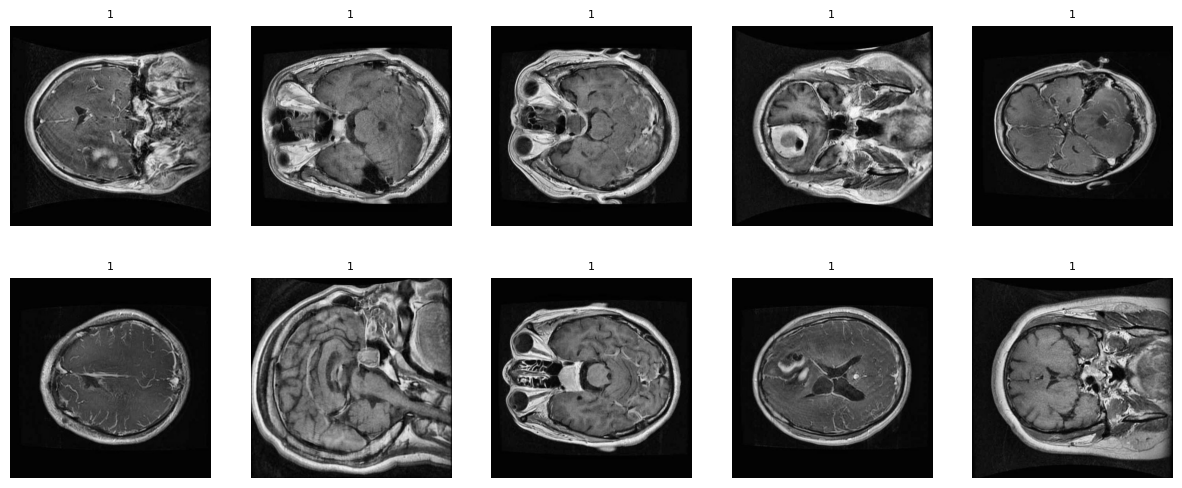

In [6]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

    # Print the full JSON description for the image
    print(f"JSON description for {img_info['file_name']}:")
    print(img_info)

plt.show()

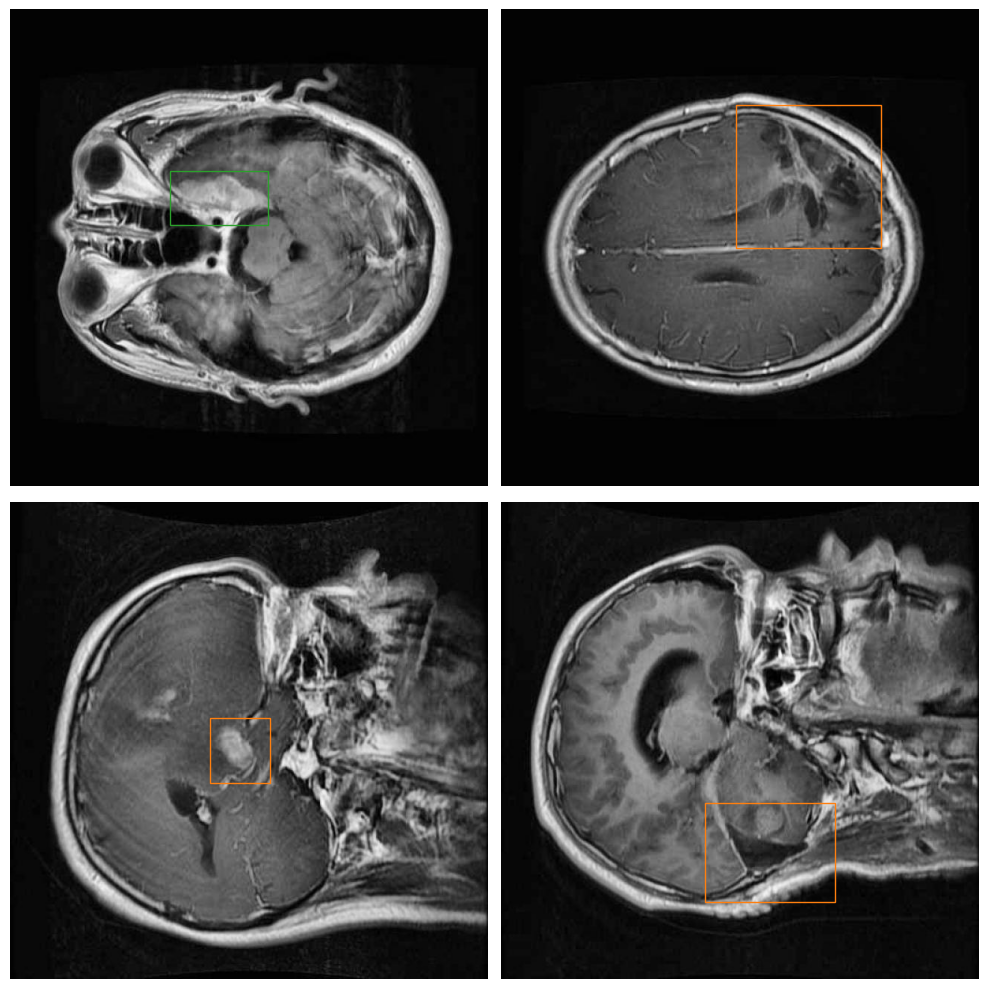

In [7]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)

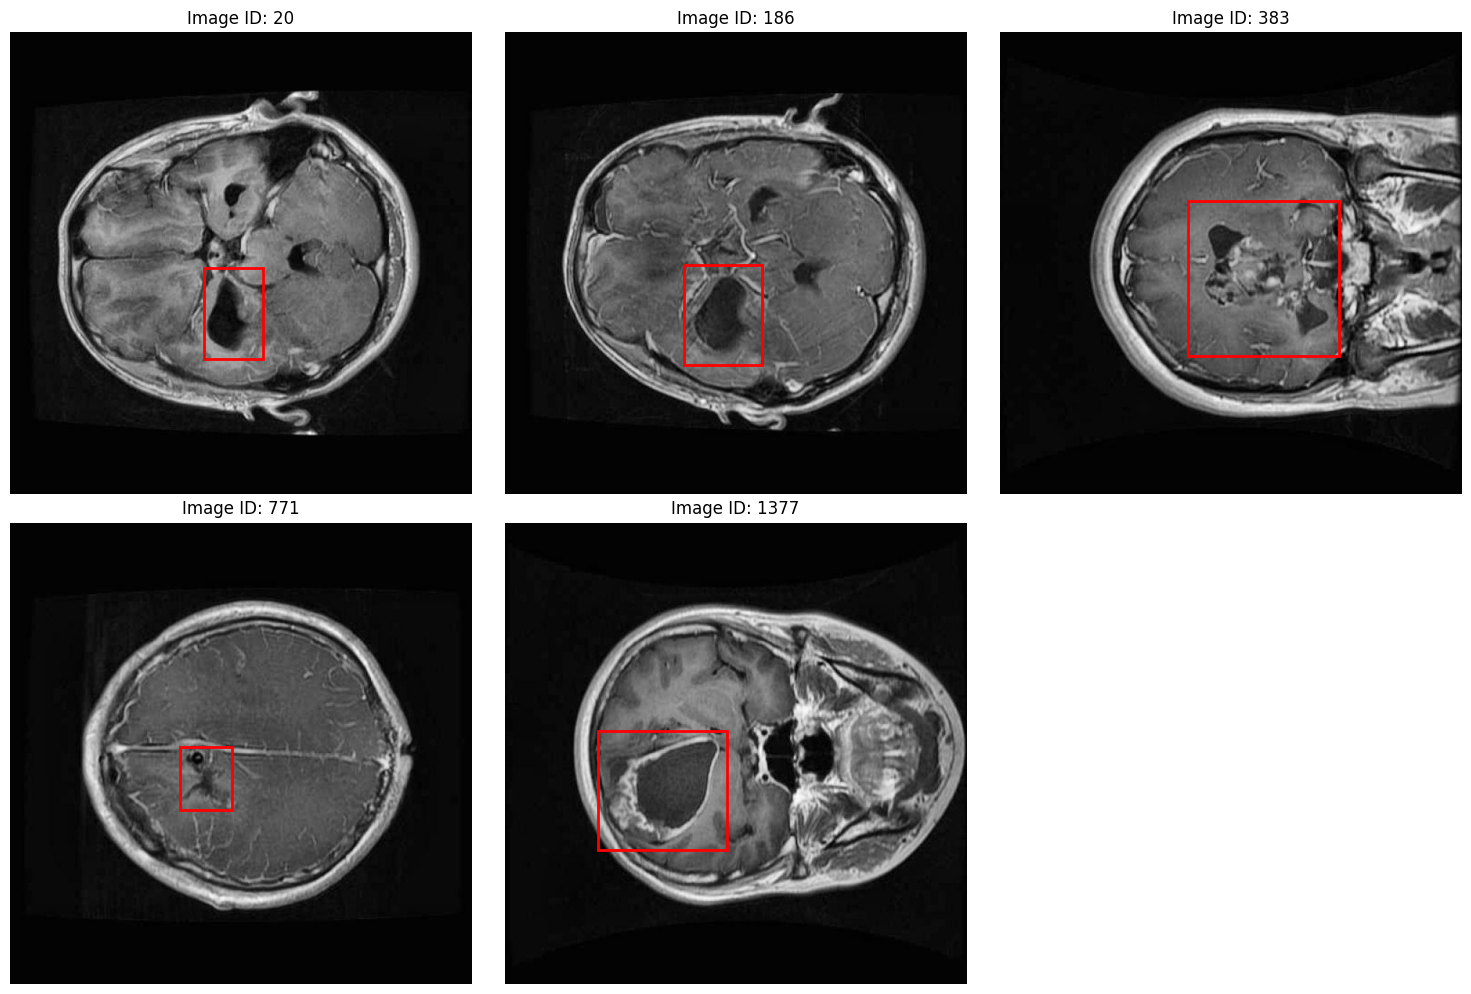

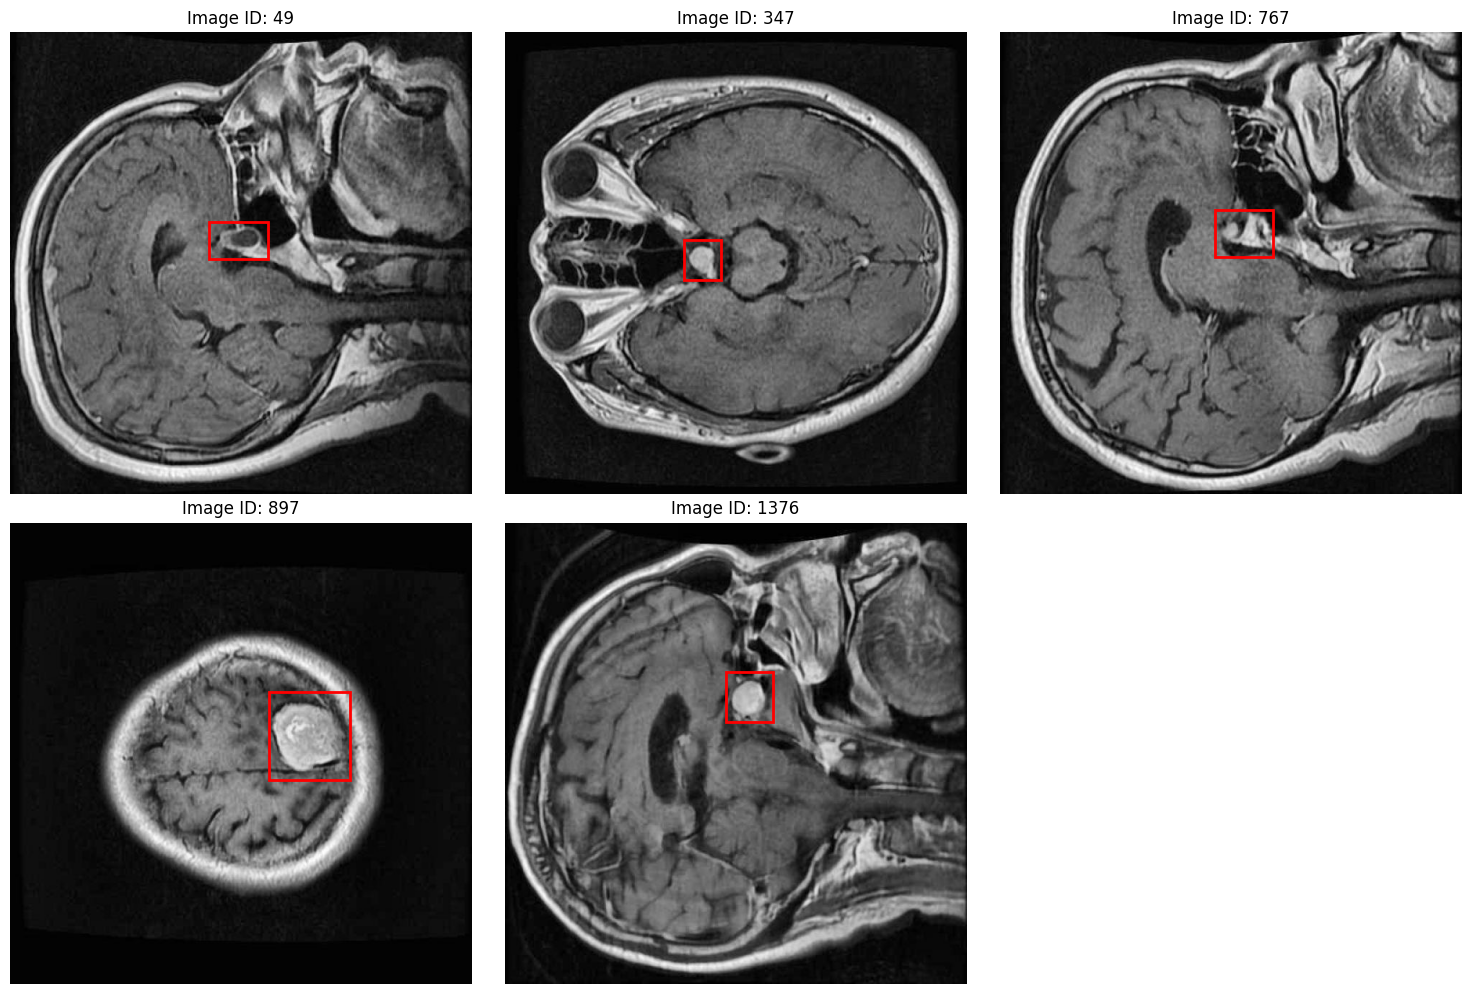

In [8]:
# Display 5 random images for category_id = 1
display_images_by_category(train, category_id=1, num_images=5)

# Display 5 random images for category_id = 2
display_images_by_category(train, category_id=2, num_images=5)

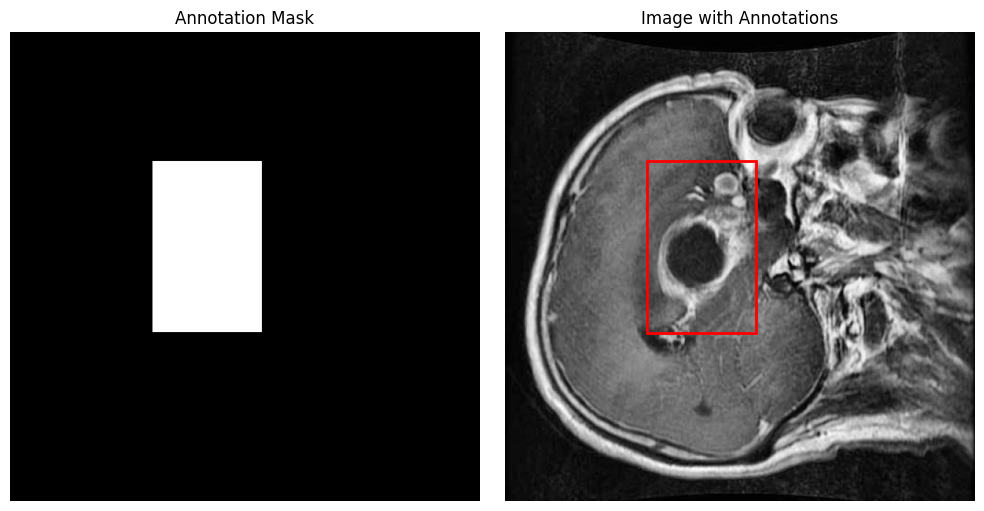

In [11]:
# Example usage
visualize_annotation_mask(train, image_id=1, show_annotations=True)